__Kaggle competition - digit recognizer__

1. [Kaggle competition - digit recognizer](#Kaggle-competition-digit-recognizer)
1. [Import](#Import)
    1. [Tools](#Tools)
    1. [Data](#Data)    
1. [Initial EDA](#Initial-EDA)
    1. [Target variable evaluation](#Target-variable-evaluation)    
1. [Modeling](#Modeling)
    1. [Prepare training data](#Prepare-training-data)
    1. [Prepare validation data](#Prepare-validation-data)
    1. [GridSearch](#GridSearch)
        1. [Evaluation](#Evaluation)
1. [Submission](#Submission)
    1. [Stack](#Stack)
    1. [Standard](#Standard)


# Kaggle competition - digit recognizer



<a id = 'Kaggle-competition-digit-recognizer'></a>

# Import

<a id = 'Import'></a>

## Tools

<a id = 'Tools'></a>

In [2]:
# Standard libary and settings
import os
import sys
import importlib
import itertools
import csv
import ast
from timeit import default_timer as timer
global ITERATION
import time
rundate = time.strftime('%Y%m%d')
comp = 'digits'

import warnings; warnings.simplefilter('ignore')
from IPython.core.display import display, HTML; display(HTML("<style>.container { width:95% !important; }</style>"))

# Data extensions and settings
import numpy as np
np.set_printoptions(threshold = np.inf, suppress = True)
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:,.6f}'.format

# Modeling extensions
import sklearn.base as base
import sklearn.cluster as cluster
import sklearn.datasets as datasets
import sklearn.decomposition as decomposition
import sklearn.discriminant_analysis as discriminant_analysis
import sklearn.ensemble as ensemble
import sklearn.feature_extraction as feature_extraction
import sklearn.feature_selection as feature_selection
import sklearn.gaussian_process as gaussian_process
import sklearn.linear_model as linear_model
import sklearn.kernel_ridge as kernel_ridge
import sklearn.metrics as metrics
import sklearn.model_selection as model_selection
import sklearn.naive_bayes as naive_bayes
import sklearn.neighbors as neighbors
import sklearn.pipeline as pipeline
import sklearn.preprocessing as preprocessing
import sklearn.svm as svm
import sklearn.tree as tree
import sklearn.utils as utils

from scipy import stats, special
import xgboost
import lightgbm
import catboost

from hyperopt import hp, tpe, Trials, fmin, STATUS_OK
from hyperopt.pyll.stochastic import sample

# Visualization extensions and settings
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

# Custom extensions and settings
sys.path.append('/main') if '/main' not in sys.path else None
# sys.path.append('C:/Users/petersont/Atheneum/dev') if 'C:/Users/petersont/Atheneum/dev' not in sys.path else None
sys.path.append('U:\\') if 'U:\\' not in sys.path else None

import mlmachine as mlm
import quickplot as qp


<Figure size 432x288 with 0 Axes>

## Data

<a id = 'Data'></a>

In [8]:
# Load data and print dimensions
dfTrain = pd.read_csv('data/train.csv', sep = ',')
dfValid = pd.read_csv('data/test.csv', sep = ',')

print('Training data dimensions: {}'.format(dfTrain.shape))
print('Validation data dimensions: {}'.format(dfValid.shape))


Training data dimensions: (42000, 785)
Validation data dimensions: (28000, 784)


In [10]:
#
label = dfTrain['label']
dfTrain = dfTrain.drop(labels = 'label', axis = 1)


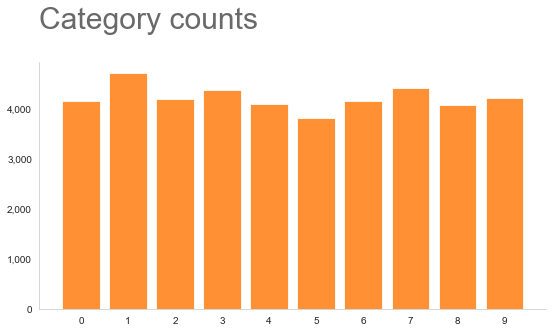

In [31]:
cats, counts = np.unique(label, return_counts = True)

p = qp.plotter.QuickPlot(fig = plt.figure(), chartProp = 20)
ax = p.makeCanvas(title = 'Category counts', xLabel = '', yLabel = ''
                ,yShift = 0.8, position = 221)
p.qpBarV(x = cats
        ,counts = counts
        ,labelRotate = 0
        ,color = qp.style.styleHexMid[2]
        ,yUnits = 'f'
        ,ax = ax)

In [13]:
label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

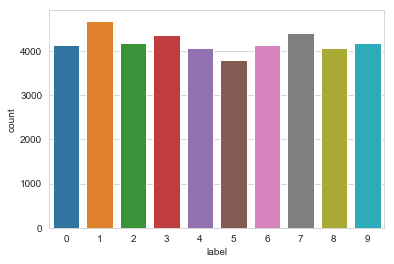

In [14]:
sns.countplot(label)

# Initial EDA

<a id = 'Initial-EDA'></a>

## Target variable evaluation

<a id = 'Target-variable-evaluation'></a>

In [ ]:
# null score
pd.Series(train.y_).value_counts(normalize = True)


# Modeling

<a id = 'Modeling'></a>

## Prepare training data

<a id = 'Prepare-training-data'></a>

## Prepare validation data

<a id = 'Prepare-validation-data'></a>

## GridSearch

<a id = 'GridSearch'></a>

In [ ]:
 # parameter space
allSpace = {
            'lightgbm.LGBMClassifier' : {
                'class_weight' : hp.choice('class_weight', [None])
                ,'colsample_bytree': hp.uniform('colsample_bytree', 0.4, 0.7)
                ,'boosting_type' : hp.choice('boosting_type', ['dart'])                
                ,'subsample': hp.uniform('subsample', 0.5, 1)
                ,'learning_rate' : hp.uniform('learning_rate', 0.15, 0.25)
                ,'max_depth' : hp.choice('max_depth', np.arange(4, 20, dtype = int))
                ,'min_child_samples' : hp.quniform('min_child_samples', 50, 150, 5)
                ,'n_estimators' : hp.choice('n_estimators', np.arange(100, 4000, 10, dtype = int))
                ,'num_leaves': hp.quniform('num_leaves', 30, 70, 1)
                ,'reg_alpha': hp.uniform('reg_alpha', 0.75, 1.25)
                ,'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0)
                ,'subsample_for_bin': hp.quniform('subsample_for_bin', 100000, 350000, 20000)
            }
}


In [ ]:
# execute bayesian optimization grid search
analysis = 'digit'
train.execBayesOptimSearch(allSpace = allSpace
                           ,resultsDir = 'data/{}_hyperopt_{}.csv'.format(rundate, analysis)
#                            ,model = ''
                           ,X = train.X_
                           ,y = train.y_
                           ,scoring = 'accuracy'
                           ,n_folds = 8
                           ,n_jobs = 16
                           ,iters = 1000
                           ,verbose = 0)


### Evaluation

In [ ]:
# read scores summary table
resultsDf = pd.read_csv('data/20190423_hyperopt_titanic.csv', na_values = 'nan')
results = train.unpackParams(resultsDf)


In [ ]:
# loss plot
train.lossPlot(resultsDf = results)


In [ ]:
# estimator parameter plots
train.paramPlot(results = results, allSpace = allSpace, nIter = 100)


In [ ]:
sampleSpace = {
#             'param': hp.uniform('param', np.log(0.4), np.log(0.6))
            '' : 0.000001 + hp.uniform('gamma', 0.000001, 10)
#             'param2': hp.loguniform('param2', np.log(0.001), np.log(0.01))
        }

train.samplePlot(sampleSpace, 1000)


<a id = 'Evaluation'></a>

# Submission

<a id = 'Submission'></a>

## Standard

<a id = 'Standard'></a>

In [ ]:
## standard model fit and predict

# select estimator and iteration
estimator = 'lightgbm.LGBMClassifier'
iteration = 2264

# extract params and instantiate model
params = train.paramExtractor(resultsDf = resultsDf, estimator = estimator, iteration = iteration)
model = eval('{0}(**{1})'.format(estimator, params))

# fit model and make predictions
model.fit(train.X_, train.y_)
yPred = model.predict(valid.X_)


In [ ]:
# generate prediction submission file
my_submission = pd.DataFrame({'PassengerId': dfValid.PassengerId, 'Survived': yPred})
my_submission.to_csv('data/submission.csv', index = False)
